## Import Libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## 1.The Data

In [57]:
df_russia = pd.read_csv(r"C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Contries_Data\Russia_history_data.csv")

In [58]:
df_russia.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,russia,01/01/1970,10.1,-2.1,4.7,-19.7,NaN,0.0,NaN,13.9,NaN,6.2,48.3,84.54,Partially cloudy
1,russia,01/02/1970,19.1,-3.9,10.4,-14.6,NaN,0.0,NaN,18.3,NaN,3.1,87.5,89.14,Overcast
2,russia,01/03/1970,28.1,20.9,25.5,7.9,NaN,0.0,NaN,18.3,NaN,3.7,92.5,91.09,Overcast
3,russia,01/04/1970,26.9,20.9,22.7,6.9,NaN,0.0,NaN,16.1,NaN,3.7,97.5,89.49,Overcast
4,russia,01/05/1970,32.1,28.1,29.5,18.2,NaN,0.0,NaN,16.1,NaN,2.7,100.0,92.43,Overcast


## 2.EDA and Feature Engineering

In [59]:
#checking all columns
df_russia.columns

Index(['Name', 'Date time', 'Maximum Temperature', 'Minimum Temperature',
       'Temperature', 'Wind Chill', 'Heat Index', 'Precipitation',
       'Snow Depth', 'Wind Speed', 'Wind Gust', 'Visibility', 'Cloud Cover',
       'Relative Humidity', 'Conditions'],
      dtype='object')

<b> Feature Description </b><br>
<hr>

`Temperature`: Average Temp (deg F)<br>
`Precipitation`: Water that is falling out of the sky, this could be rain, drizzle, snow, sleet, hail or something rarer. (Inches)<br>
`Wind Chill` - the cooling effect of wind blowing on a surface(Temp a human feels becuase of heat is loss from the exposed skin)	(deg F)<br>
`Heat Index` - The Heat Index is a measure of how hot it really feels when relative humidity is factored in with the actual air temperature. (deg F)<br>
`Snow Depth` -  Determine the depth of the new and old snow remaining on the ground at observation time. (Inches)<br>
`Wind Speed` - Speed of wind in (Miles/hour)<br>
`Wind Gust` -  brief increase in the speed of the wind (Miles/hour) <br>
`Visibility` - visibility is a measure of the distance at which an object or light can be clearly discerned (Miles)<br>
`Cloud Cover` - fraction of the sky obscured by clouds when observed from a particular location ()<br>
`Relative Humidity` - Relative humidity is the ratio of the partial pressure of water vapor to the equilibrium vapor pressure of water at a given temperature<br>
`Condition` - Condition of the whole day.

In [60]:
#shape of dataset
df_russia.shape

(18019, 15)

In [61]:
#datatypes of columns
df_russia.dtypes

Name                    object
Date time               object
Maximum Temperature    float64
Minimum Temperature    float64
Temperature            float64
Wind Chill             float64
Heat Index             float64
Precipitation          float64
Snow Depth             float64
Wind Speed             float64
Wind Gust              float64
Visibility             float64
Cloud Cover            float64
Relative Humidity      float64
Conditions              object
dtype: object

### 2.1 Missing Data

In [62]:
#printing missing data sum
df_russia.isnull().sum()

Name                       0
Date time                  0
Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill              4957
Heat Index             17141
Precipitation              0
Snow Depth             12669
Wind Speed                 0
Wind Gust              17186
Visibility                34
Cloud Cover                2
Relative Humidity          0
Conditions                 0
dtype: int64

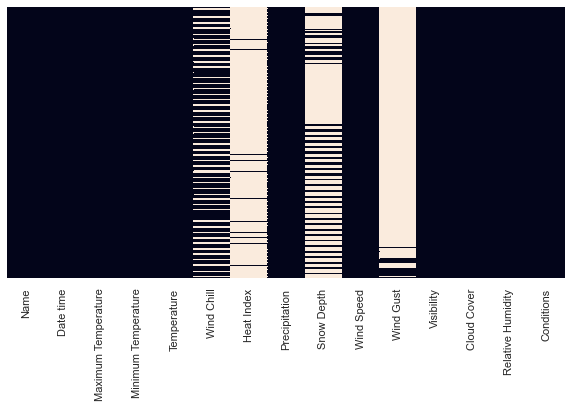

In [63]:
plt.figure(figsize=(10,5))
sns.heatmap(df_russia.isnull(),yticklabels=False,cbar=False,cmap='rocket')

Ignoring Heat Index, Snow Depth and wind gust as these columns have more than 80 percent of null values, For visibility we would consider imputing the missing values with mean as there are less than 10% of values missing

In [64]:
df_russia.drop(columns=['Snow Depth','Heat Index','Wind Gust','Wind Chill'],inplace=True)

In [65]:
df_russia.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
0,russia,01/01/1970,10.1,-2.1,4.7,0.0,13.9,6.2,48.3,84.54,Partially cloudy
1,russia,01/02/1970,19.1,-3.9,10.4,0.0,18.3,3.1,87.5,89.14,Overcast
2,russia,01/03/1970,28.1,20.9,25.5,0.0,18.3,3.7,92.5,91.09,Overcast
3,russia,01/04/1970,26.9,20.9,22.7,0.0,16.1,3.7,97.5,89.49,Overcast
4,russia,01/05/1970,32.1,28.1,29.5,0.0,16.1,2.7,100.0,92.43,Overcast


In [66]:
#Mean Imputing for visibility
df_russia['Visibility'].fillna(df_russia['Visibility'].mean(), inplace = True)

In [67]:
df_russia['Temperature'].max()

86.4

In [68]:
df_russia['Temperature'].min()

-32.2

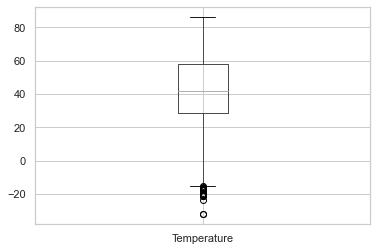

In [69]:
#plotting boxplot for outliers
df_russia.boxplot(column=['Temperature'])

Observation: Not many outliers for `Temperature`

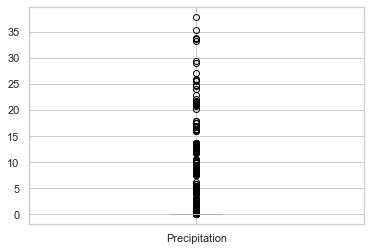

In [70]:
#plotting boxplot for outliers
df_russia.boxplot(column=['Precipitation'])

Precipitation is discrete continous data and we can't really comment anything about outliers, we will see if we can deal with outliers when dealing with Regression or Classification Problems

In [71]:
#Histogram for Temperature
sns.hist(df_russia['Temperature'])

AttributeError: module 'seaborn' has no attribute 'hist'

(array([1616., 1403., 1359., 1367., 1502., 1491., 1667., 1794., 2064.,
        3754.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

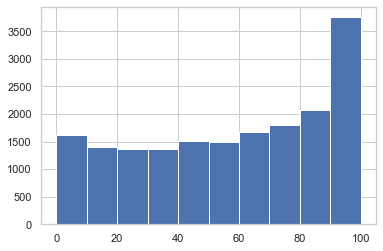

In [72]:
#Histogram for Cloud Cover
plt.hist(df_russia['Cloud Cover'])

In [73]:
##conditions vs CloudCover
df_aust_cloud_condition = df_russia[['Cloud Cover','Conditions']]

AttributeError: module 'seaborn' has no attribute 'histplot'

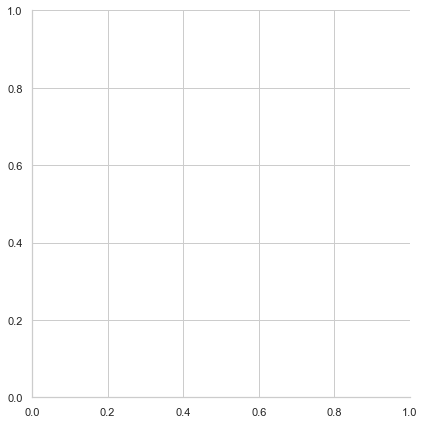

In [74]:
sns.FacetGrid(df_russia, hue="Conditions", size=6) \
   .map(sns.histplot, "Cloud Cover") \
   .add_legend();

### Count plot of Temperature with color-coding for Conditions

In [ ]:
df_russia['Conditions'].value_counts()

In [75]:
g= df_russia.groupby('Conditions')

AttributeError: module 'seaborn' has no attribute 'histplot'

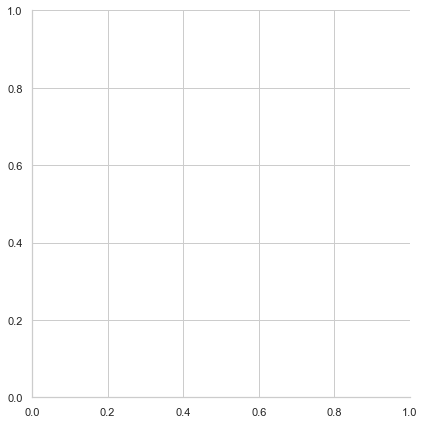

In [76]:
#overcast
sns.FacetGrid(g.get_group('Overcast'), hue="Conditions", size=6, palette='cool') \
   .map(sns.histplot, "Temperature") \
   .add_legend();

We can see that majority of days when it was `Overcast`, we get a average  temperature in the range of 57.5-67.5 Fahrenheit in Russia over the last 50 years<br>
`Overcast` generally means a weather condition where cloudcover is atleast 95%. However this 95% is not always True

AttributeError: module 'seaborn' has no attribute 'histplot'

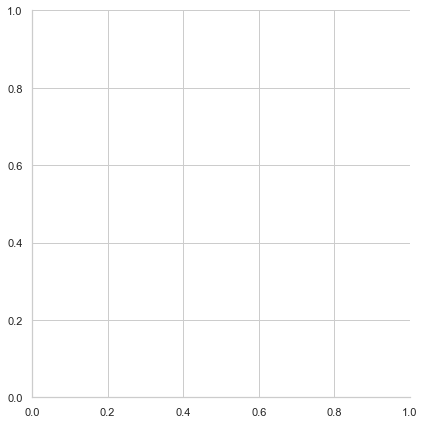

In [77]:
#partially cloudy
sns.FacetGrid(g.get_group('Partially cloudy'), hue="Conditions", size=6) \
   .map(sns.histplot, "Temperature") \
   .add_legend();
plt.show();

We can see that majority of days when it was `Partially cloudy`, we get a average temperature in the range of 44-50 Fahrenheit and 62-68 Fahrenheit in Russia over the last 50 years<br>
`Partially cloudy` generally means Cloud Cover is between 25% and 65%.

In [ ]:
#rain
sns.FacetGrid(g.get_group('Rain'), hue="Conditions", size=6, palette = "cividis") \
   .map(sns.histplot, "Temperature") \
   .add_legend();
plt.show();

It is clear that majority of days when it rains, Temperature is in the range of 40 - 50 Fahrenheit <br>
`Rain` generally means Cloud Cover is between 0 -30 Percent

AttributeError: module 'seaborn' has no attribute 'histplot'

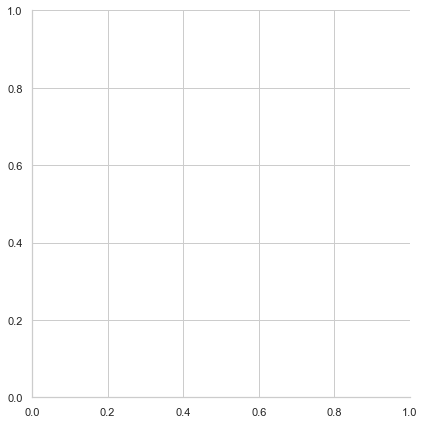

In [78]:
#snow
sns.FacetGrid(g.get_group('Snow'), hue="Conditions", size=6, palette = "cividis") \
   .map(sns.histplot, "Temperature") \
   .add_legend();

No of snowy days are significantly less in russia, So we can't draw any conclusions from here.

In [ ]:
#Clear
sns.FacetGrid(g.get_group('Clear'), hue="Conditions", size=6, palette = "spring") \
   .map(sns.histplot, "Temperature") \
   .add_legend();

I see so many skyscrappers here, We cant generate  any accurate conlcusions how Temperature is when it Weather condition is clear. However, I see Most days when it was Clear, temperature is between 52-54 Fahrenheit and 62-64 Fahrenheit<br>
`Cloud Cover` is significantly low when it `Clear`. It lies in the range of 0-20 Percent

### Count plot of Precipitation with color-coding for Conditions

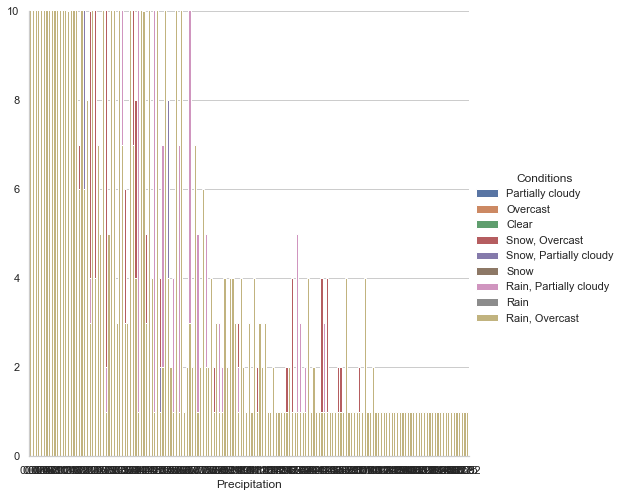

In [79]:
sns.FacetGrid(df_russia, hue="Conditions", size=7) \
   .map(sns.countplot, "Precipitation") \
   .add_legend();
plt.ylim(0,10)
plt.show();

### WindSpeed vs Temperature

`Windspeed` is generally inversely proportional to Temperature, Generally it has a correlation of -0.305 with `Temperature`

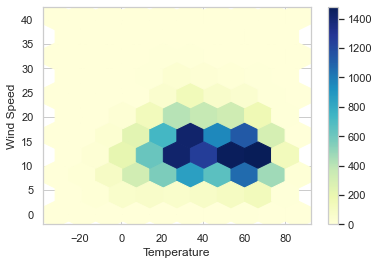

In [80]:
df_russia.plot.hexbin(x='Temperature',y='Wind Speed',gridsize=9,cmap='YlGnBu',sharex=False)
plt.show()

### Plot of Windspeed vs Temperature with color-coding for Conditions

AttributeError: module 'seaborn' has no attribute 'histplot'

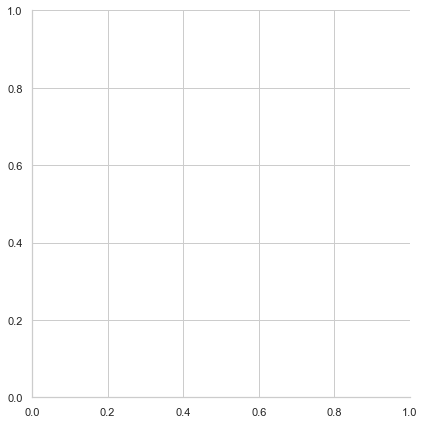

In [81]:
sns.FacetGrid(df_russia, hue="Conditions", size=6) \
   .map(sns.histplot,"Wind Speed") \
   .add_legend();
plt.show();

We can observe a lot of overlap in points for different conditions. There are some extreme high windspeeds for mid range of Temperature, We are not able to classify conditions accurately here

### Relative Humidity  vs Temperature

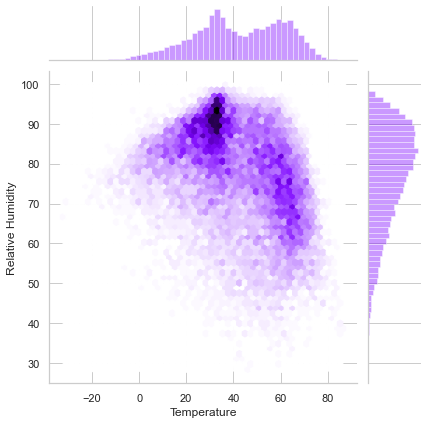

In [82]:
sns.set_palette("gist_rainbow_r")
sns.jointplot(x="Temperature",y="Relative Humidity",data=df_russia,kind='hex')

We can say that `Relative Humidity` is inversely proportional to `Temperature` <br>
Generally, If the water vapor content stays the same and the `Temperature` drops, the `Relative humidity` increases. If the water vapor content stays the same and the `Temperature` rises, the `Relative humidity` decreases

### Plot of Temperature vs Relative Humidity with color-coding for Conditions

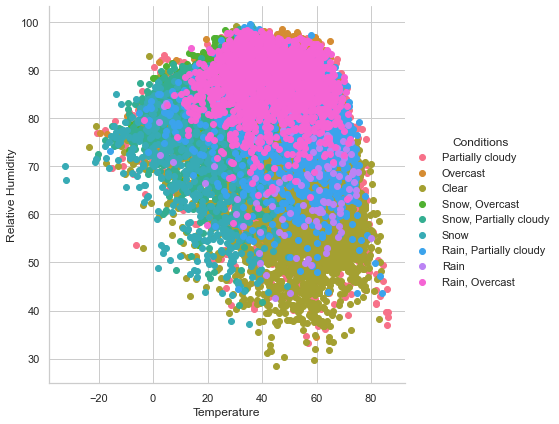

In [83]:
sns.FacetGrid(df_russia, hue="Conditions", size=6) \
   .map(plt.scatter, "Temperature", "Relative Humidity") \
   .add_legend();
plt.show();

There is a lot of overlap, but we will be able to  classify `Clear` days by using Temperature and Relative Humdity values and rest of conditions are overlapping

### Temperature in Russia Across years

In [84]:
#create a new dataframe with date and temperature
russia_temp = df_russia[['Date time','Temperature']]

#converting dt column to datetime
russia_temp['Date'] = pd.to_datetime(russia_temp['Date time'])
russia_temp['Year'] = russia_temp['Date'].map(lambda x: x.year)
russia_temp['Month'] = russia_temp['Date'].map(lambda x: x.month)

In [85]:
#calculating average Temperature across Russia
russia_avg_temp = russia_temp.groupby('Year')['Temperature'].mean().reset_index()

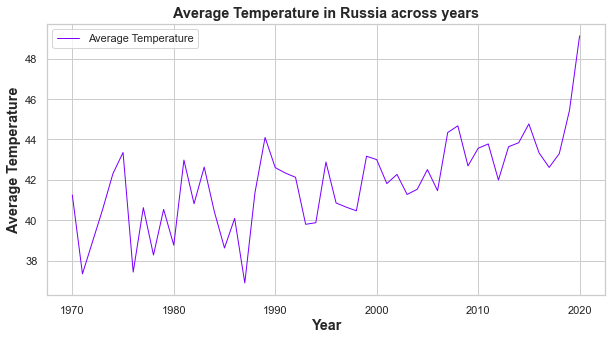

In [86]:
plt.figure(figsize=(10,5))
plt.plot(russia_avg_temp['Year'],russia_avg_temp['Temperature'],linewidth=1,label = "Average Temperature")
plt.ylabel("Average Temperature",fontweight='bold',fontsize = 'x-large')
plt.xlabel("Year",fontweight= 'bold',fontsize = 'x-large')
plt.title("Average Temperature in Russia across years",fontsize = 'x-large',fontweight='bold')
plt.legend()

In [87]:
#calculuation maximum Temperature in Russia across years
russia_temp_max = russia_temp.groupby('Year')['Temperature'].max().reset_index()
russia_temp_max.head()

,Year,Temperature
0,1970,83.0
1,1971,72.4
2,1973,74.5
3,1974,71.9
4,1975,74.7


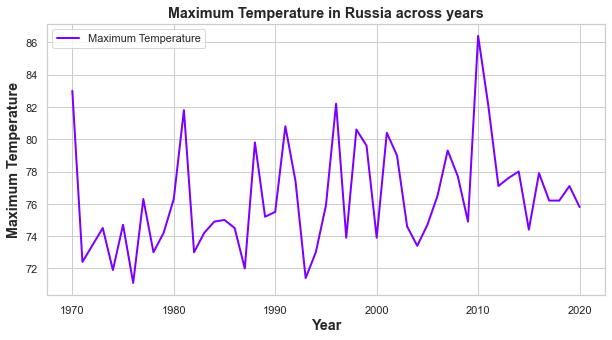

In [88]:
plt.figure(figsize=(10,5))
plt.plot(russia_temp_max['Year'],russia_temp_max['Temperature'],linewidth=2,label = "Maximum Temperature")
plt.ylabel("Maximum Temperature",fontweight= 'bold',fontsize = 'x-large')
plt.xlabel("Year",fontweight= 'bold',fontsize = 'x-large')
plt.title("Maximum Temperature in Russia across years",fontsize = 'x-large', fontweight = 'bold')
plt.legend()

### Temperature in each season across Years

In [89]:
#function for getting season based on month
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
    
min_year = russia_temp['Year'].min()
max_year = russia_temp['Year'].max()
years = range(min_year, max_year + 1)
    
russia_temp['Season'] = russia_temp['Month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    years_data = russia_temp[russia_temp['Year'] == year]
    spring_temps.append(years_data[years_data['Season'] == 'Spring']['Temperature'].mean())
    summer_temps.append(years_data[years_data['Season'] == 'Summer']['Temperature'].mean())
    autumn_temps.append(years_data[years_data['Season'] == 'Autumn']['Temperature'].mean())
    winter_temps.append(years_data[years_data['Season'] == 'Winter']['Temperature'].mean())

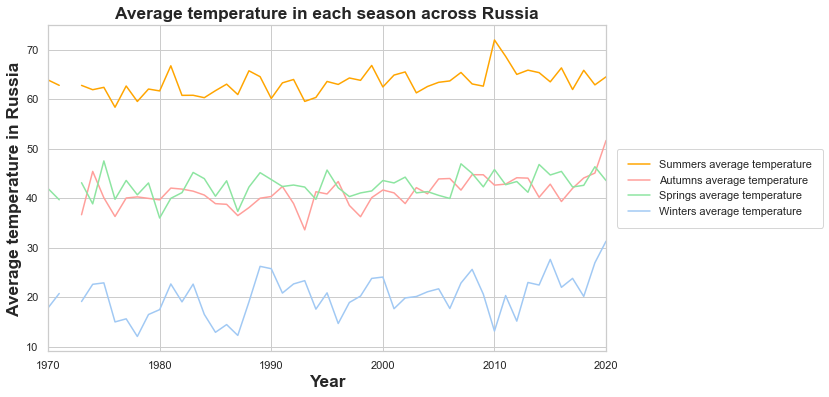

In [90]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature in Russia',fontsize = 'x-large', fontweight = 'bold')
ax.set_xlabel('Year',fontsize = 'x-large', fontweight = 'bold')
ax.set_title('Average temperature in each season across Russia',fontsize = 'x-large', fontweight = 'bold')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Season_Avg_Temp_Russia.png')

## Precipitation Across Russia

In [ ]:
rainfall_aus = df_russia[['Date time','Precipitation']]
rainfall_aus['Date'] = pd.to_datetime(rainfall_aus['Date time'])
rainfall_aus['Year'] = russia_temp['Date'].map(lambda x: x.year)
rainfall_aus.head()

In [ ]:
#calculating average precipitation across Russia
rainfall_aus_annual = rainfall_aus.groupby('Year')['Precipitation'].mean().reset_index()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(rainfall_aus_annual['Year'],rainfall_aus_annual['Precipitation'],linewidth=3,label = "Average Precipitation")
plt.ylabel("Average Precipitation",fontweight= 'bold',fontsize = 'x-large')
plt.xlabel("Year",fontweight= 'bold',fontsize = 'x-large')
plt.title("Average Precipitation in Russia across years",fontsize = 'x-large', fontweight = 'bold')
plt.legend()

In [ ]:
#calculuation maximum precipitation across Russia
rainfall_aus_annual_max = rainfall_aus.groupby('Year')['Precipitation'].max().reset_index()
rainfall_aus_annual_max.head()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(rainfall_aus_annual_max['Year'],rainfall_aus_annual_max['Precipitation'],linewidth=3,label = "Maximum Precipitation")
plt.ylabel("Maximum Precipitation",fontweight= 'bold',fontsize = 'x-large')
plt.xlabel("Year",fontweight= 'bold',fontsize = 'x-large')
plt.title("Maximum Precipitation in Russia across years",fontsize = 'x-large', fontweight = 'bold')
plt.legend()

## Temperature vs Preciptiation

In [ ]:
#create a new dataframe with date,temperature and precipitation
aus_temp_prec = df_russia[['Date time','Temperature','Precipitation']]

#converting dt column to datetime
aus_temp_prec['Date'] = pd.to_datetime(aus_temp_prec['Date time'])
aus_temp_prec['Year'] = aus_temp_prec['Date'].map(lambda x: x.year)
aus_temp_prec['Month'] = aus_temp_prec['Date'].map(lambda x: x.month)

In [ ]:
aus_temp_prec.head()

In [ ]:
#checking Average temperature vs Precipitation across years
aus_temp_prec=aus_temp_prec.groupby('Year')['Precipitation','Temperature'].mean().reset_index()
aus_temp_prec.head()

In [ ]:
#plotting scatterplot 
aus_temp_prec.plot(kind='hexbin',x='Temperature',y='Precipitation',figsize=(10,10),sharex=False)
plt.ylabel("Precipitation",fontweight= 'bold',fontsize = 'x-large')
plt.xlabel("Temperature",fontweight= 'bold',fontsize = 'x-large')
plt.title("Precipitation vs Temperature across Russia from 1970-present",fontweight= 'bold',fontsize = 'x-large')

### Exploring conditions in the main dataframe

In [ ]:
df_russia['Conditions'].value_counts()

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df_russia['Conditions'])

Majority of Days were Partially Cloudy, but it will be interesting to see how this conditions were determined actually